# Сборный проект

**Описание проекта**:  
Интернет-магазин «Стримчик», специализирующийся на продаже компьютерных игр по всему миру, стремится выявить закономерности, определяющие успешность игр. Это позволит компании делать ставки на потенциально популярные продукты и эффективно планировать рекламные кампании. В распоряжении имеются исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах до 2016 года. На основе этих данных необходимо проанализировать рынок, определить актуальные тренды и спрогнозировать спрос на 2017 год.  

**Данные**:  
- Название игры (`name`)  
- Платформа (`platform`)  
- Год выпуска (`year_of_release`)  
- Жанр (`genre`)  
- Продажи в Северной Америке (`na_sales`), Европе (`eu_sales`), Японии (`jp_sales`) и других регионах (`other_sales`)  
- Оценки критиков (`critic_score`) и пользователей (`user_score`)  
- Возрастной рейтинг (`rating`)  

**Цель исследования**:  
1. Выявить ключевые факторы, влияющие на успешность игр.  
2. Определить наиболее перспективные платформы, жанры и регионы для планирования рекламной кампании на 2017 год.  
3. Проверить гипотезы о влиянии оценок пользователей и жанров на продажи.  

**Ход исследования**:  

1. Изучение данных  
- Анализ структуры данных, проверка на пропуски и аномалии.  
- Изучение распределения игр по годам, платформам и жанрам.  

2. Предобработка данных  
- Приведение названий столбцов к нижнему регистру.  
- Преобразование типов данных (например, `year_of_release` в целочисленный тип).  
- Обработка пропусков:  
  - Заполнение или удаление пропусков в зависимости от контекста.  
  - Особое внимание к значению `tbd` (to be determined) в столбце `user_score`.  
- Добавление столбца с общими продажами (`total_sales`).  

3. Исследовательский анализ данных  
- Анализ динамики выпуска игр по годам. Определение актуального периода для прогноза (исключение устаревших данных).  
- Изучение продаж по платформам:  
  - Выбор платформ с наибольшими продажами.  
  - Анализ жизненного цикла платформ (появление и уход с рынка).  
- Построение "ящика с усами" для анализа распределения продаж по платформам.  
- Исследование влияния оценок пользователей и критиков на продажи (корреляционный анализ).  
- Анализ распределения игр по жанрам и их вклада в продажи.  

4. Портрет пользователя по регионам  
- Определение топ-5 платформ и жанров для Северной Америки, Европы и Японии.  
- Анализ различий в предпочтениях между регионами.  
- Исследование влияния рейтинга ESRB на продажи в каждом регионе.  

5. Проверка гипотез  
- **Гипотеза 1**: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
  - Нулевая гипотеза (`H0`): Средние рейтинги равны.  
  - Альтернативная гипотеза (`H1`): Средние рейтинги отличаются.  
  - Критерий: t-тест для независимых выборок.  

- **Гипотеза 2**: Средние пользовательские рейтинги жанров Action и Sports разные.  
  - Нулевая гипотеза (`H0`): Средние рейтинги равны.  
  - Альтернативная гипотеза (`H1`): Средние рейтинги отличаются.  
  - Критерий: t-тест для независимых выборок.  

6. Общий вывод  
- Формулировка ключевых выводов о факторах успешности игр.  
- Рекомендации для планирования рекламной кампании на 2017 год.  
- Ограничения исследования и возможные направления дальнейшего анализа.  

**Ожидаемый результат**:  
На основе анализа данных будут выделены наиболее перспективные платформы, жанры и регионы для фокусировки маркетинговых усилий. Проверка гипотез поможет понять, на какие аспекты (оценки пользователей, жанры) стоит обратить внимание при выборе игр для продвижения.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt 
from matplotlib.patches import Patch
from matplotlib.ticker import MultipleLocator

plt.style.use('ggplot')

## Изучение данных

### Загрузка датасета

In [2]:
try:
    data = pd.read_csv('./Data/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')
finally:
    display(data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Изучение общей информации о данных

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
data.Rating.value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

Про существующие рейтинги:

Вот таблица с категориями ESRB и их описанием, без указания количества игр:

| Рейтинг | Описание категории |
|---------|--------------------|
| E       | Everyone (Для всех, 6+) |
| T       | Teen (Для подростков, 13+) |
| M       | Mature (Для взрослых, 17+) |
| E10+    | Everyone 10+ (Для всех от 10 лет) |
| EC      | Early Childhood (Для малышей) |
| K-A     | Kids to Adults (Устаревший, аналогичен E) |
| AO      | Adults Only (Только для взрослых, 18+) |
| RP      | Rating Pending (Рейтинг ожидается) |

### Вывод

Быстрый просмотр выявил следующие особенности:
* наличие большого числа пропусков в оценках игр, а также их возрастных рейтингах
* меньше пропусков есть в названиях и годе релиза 
* в продажах игр вероятнее всего присутствуют выбросы (NA_sales имеет среднее в 3 раза больше медианы)
* тип данных в столбце User_Score указан object, вместо float, а в year_of_release float вместо int 
* в данных могут быть повторы, так как есть устаревший рейтинг "K-A"

С точки зрения оформления, видим, что в названиях столбцов присутствуют заглавные буквы

## Предобработка данных

### Названий столбцов

Переведем названия столбцов в строчный формат

In [7]:
data.columns = data.columns.str.lower()

### Типизация

Выведем типы данных

In [8]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Изменим типы данных следующих столбцов:

year_of_release -> int 

user_score -> float

Есть трудности: в данных о годе релиза есть пропуски np.nan, поэтому перевести столбец в int сразу не получится (pandas.NA в python 3.9 еще нет). В данных о оценке игроков присутствуют значения 'tbd' ('to be determined' - по сути, пропуски). 

Заменим все пропуски на -1, что позволит отличать данные с выбросами, но при этом не поменшает изменению типизации

In [9]:
data['year_of_release'] = data['year_of_release'].fillna(-1).astype(int)

data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

data['user_score'] = data['user_score'].fillna(-1).astype(float)

### Дубликаты

При первом анализе данных мы нашли наличие устаревшего рейтинга K-A. Посмотрим сколько таких записей есть. Заменим на новое значение E

In [10]:
print('Число игр с рейтингом "K-A":', end=' ')
print(data[data['rating'] == 'K-A'].shape[0])

data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

Число игр с рейтингом "K-A": 3


Теперь посмотрим есть ли явные дубликаты

In [11]:
data.duplicated().sum()

0

Точных дубликатов нет. Посмотрим на дубликаты в столбцах `name`

In [12]:
data.duplicated(subset=['name']).sum()

5155

Посмотрим что это за данные

In [13]:
data[data.duplicated(subset=['name'])].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M


Видим, что это межплатформенные игры. Посмотрим на дубликаты по столбцам `name`, `platform`

In [14]:
data.duplicated(subset=['name', 'platform']).sum()

5

Посмотрим что это за данные

In [15]:
data[data.duplicated(subset=['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,-1.0,NaN
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,-1,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,-1.0,NaN
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Выбросим следующие строки:

* 16230 - слишком мало продаж, в сравнении с 604
* 1190, 11715 - Need for Speed: Most Wanted вышла в 2005
* 4127 - пропуск в дате, ошибка в продажах
* 5972 - слишком низкие продажи

In [16]:
data.drop(index=[16230, 1190, 11715, 4127, 5972], inplace=True)

### Пропуски

Еще раз проверим какие остались пропуски в данных

In [17]:
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score            0
rating             6766
dtype: int64

**name**

Посмотрим на эти две записи

In [18]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,-1.0,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,-1.0,NaN


Две старые игры, названия которых мы вряд ли сможем восстановить. Эти две записи имеют и другие пропуски, так что их можем просто удалить

In [19]:
data = data.dropna(subset=['name'])

**genre**

In [20]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Обе записи без жанра уже были удалены

**critic_score**

У нас есть много пропусков в столбце critic_score. Посмотрим есть ли корреляция между оценками критиков и пользователей

In [21]:
data.loc[data['user_score'] != -1, ['critic_score', 'user_score']].corr()

,critic_score,user_score
critic_score,1.00000,0.58073
user_score,0.58073,1.00000


Особой корреляции нет. Заполнять оценки критиков на основе оценки пользователей будет ошибочно

По аналогии заполним пропуски в оценке критиков значением -1

In [22]:
data['critic_score'] = data['critic_score'].fillna(-1)

**rating**

Рейтинг самостоятельно не заполним. Введем новое значение 'tbd' для пропусков

In [23]:
data['rating'] = data['rating'].fillna('tbd')

Проверим остались ли пропуски

In [24]:
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Посмотрим на данные с пропусками в оценках

In [25]:
(
    data
    .query('(critic_score == -1 or user_score == -1) and year_of_release != -1')
    .loc[:, 'year_of_release']
    .describe()
)

count    9550.000000
mean     2005.767225
std         6.727305
min      1980.000000
25%      2002.000000
50%      2008.000000
75%      2010.000000
max      2016.000000
Name: year_of_release, dtype: float64

И в пропусках в рейтингах

In [26]:
(
    data
    .query('rating == "tbd" and year_of_release != -1')
    .loc[:, 'year_of_release']
    .describe()
)

count    6676.000000
mean     2004.883463
std         7.491332
min      1980.000000
25%      1999.000000
50%      2007.000000
75%      2011.000000
max      2016.000000
Name: year_of_release, dtype: float64

### Суммирование продаж во всех регионах

Добавим к данным еще один столбец `total_sales` с суммой продаж игры во всех регионах

In [27]:
data['total_sales'] = (data['na_sales'] + data['eu_sales'] + data['jp_sales'] 
                       + data['other_sales'])

### Вывод

Во время предобработки данных было сделано следующее:

* привод названий столбцов к нижнему регистру
* преобразования формата данных столбца `year_or_release` к `int`, а `user_score` - к `float`
* удаление 4 дубликатов по столбцам `name` и `platform`
* удаление двух объектов с пропусками в столбцах `name` и `genre`
* в столбцах `user_score`, `critic_score` пропуски были заменены на нереальное значение -1, чтобы не терять полезных данных. В столбце `rating` пропуски заменили на оригинальное `tbd` - значение неопределенности
* просуммировали все значения продаж во всех регионах, сохранили в новом столбце `total_sales`

Пропуски в оценках, рейтингах преимущественно принадлежат старым играм. Возможно в то время такие данные не собирали. По поводу совеременных игр - это может быть ошибка загрузки данных. Ошибки в более значимых характеристик - `name`, `year_of_release` более вероятно принадлежат ошибкам сбора или обработки данных.  

## Исследовательский анализ данных

### Изучение выпуска игр по годам

Создадим новую переменную `data_year`, куда сохраним срез данных без выбросов (-1)

In [28]:
data_year = data[data['year_of_release'] != -1]

Посмотрим на данные

In [29]:
data_year.year_of_release.describe()

count    16440.000000
mean      2006.485341
std          5.875756
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Теперь построим график распределения игр по датам выхода

<AxesSubplot:title={'center':'Распределение игр по году релиза'}, xlabel='Год релиза', ylabel='Количество игр'>

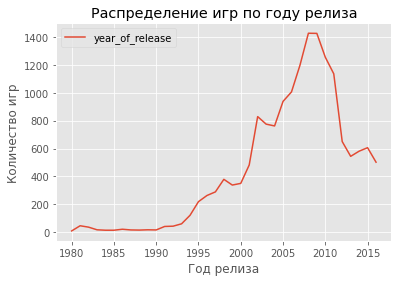

In [30]:
(
    data_year
    .loc[:, 'year_of_release']
    .value_counts()
    .sort_index()
    .reset_index()
    .plot(
        kind='line',
        x='index',
        y='year_of_release',
        title='Распределение игр по году релиза',
        xlabel='Год релиза',
        ylabel='Количество игр'
    )
)

In [31]:
print('Доля игр, выпущенных после 2000 года:', end=' ')
a = data_year[data_year['year_of_release'] > 2000].shape[0] / data_year.shape[0]
print(f'{a:.2%}')

Доля игр, выпущенных после 2000 года: 85.86%


Видим, что до 2000 года игр мало, основная масса игр была выпущена позже. В дальнейшем при изучении игр по годам будем рассматривать `year_of_release >= 2000`. Создадим для этого переменную `intr_data` - интересные данные.

In [32]:
intr_data = data_year[data_year['year_of_release'] >= 2000]

Посмотрим распределение этих данных

<AxesSubplot:title={'center':'Распределение игр по году релиза'}, xlabel='Год релиза', ylabel='Количество игр'>

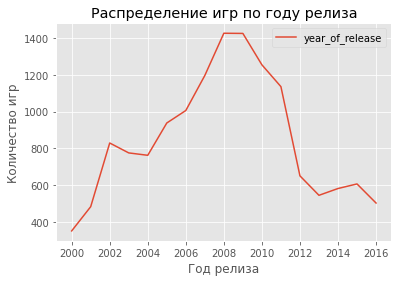

In [33]:
(
    intr_data
    .loc[:, 'year_of_release']
    .value_counts()
    .sort_index()
    .reset_index()
    .plot(
        kind='line',
        x='index',
        y='year_of_release',
        title='Распределение игр по году релиза',
        xlabel='Год релиза',
        ylabel='Количество игр'
    )
)

Построим также зависимость суммарных продаж по годам

<AxesSubplot:title={'center':'Распределение продаж по году релиза'}, xlabel='Год релиза', ylabel='Количество продаж, млн'>

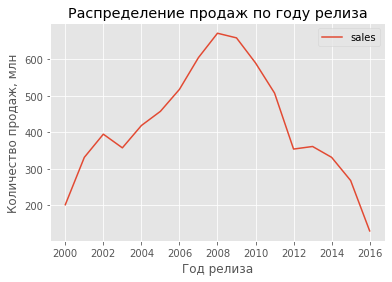

In [34]:
(
    intr_data
    .loc[:, ['year_of_release', 'total_sales']]
    .groupby('year_of_release')
    .agg(sales=('total_sales', 'sum'))
    .reset_index()
    .plot(
        kind='line',
        x='year_of_release',
        y='sales',
        title='Распределение продаж по году релиза',
        xlabel='Год релиза',
        ylabel='Количество продаж, млн'
    )
)

Интересно, что, судя по нашим данным, со временем люди начали меньше покапать игр. Скорее всего это все-таки связано с самим магазином, нежели с рынком игр, так как доступность и популярность все-таки должна расти

### Изучение изменения продаж по платформам за разные годы

Посчитаем общие продажи по различным платформам

In [35]:
(
    intr_data
    .pivot_table(
        index='platform',
        values='total_sales',
        aggfunc='sum'
    )
    .sort_values(
        by='total_sales',
        ascending=False
        )
)

,total_sales
platform,
PS2,1233.56
X360,959.68
PS3,931.33
Wii,891.18
DS,802.76
PS4,314.14
GBA,312.88
PSP,289.53
3DS,257.81


Наибольшее количество продаж представлено на платформе PS2. Построим распределение игр для этой платформе по годам

<AxesSubplot:title={'center':'Распределение продаж игр на PS2 по году релиза'}, xlabel='Год релиза', ylabel='Количество продаж, млн'>

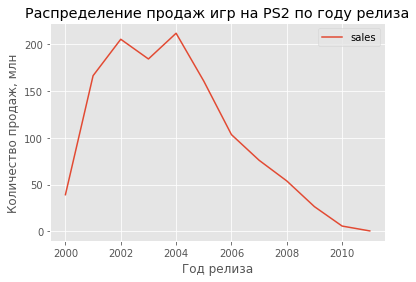

In [36]:
(
    intr_data
    .loc[intr_data['platform'] == 'PS2',
         ['year_of_release', 'total_sales']]
    .groupby('year_of_release')
    .agg(sales=('total_sales', 'sum'))
    .reset_index()
    .plot(
        kind='line',
        x='year_of_release',
        y='sales',
        title='Распределение продаж игр на PS2 по году релиза',
        xlabel='Год релиза',
        ylabel='Количество продаж, млн'
    )
)

Видим, что пик продаж приходится на 2002-2004 года, затем на смену PS2 пришли PS3, PS4 и популярность начала падать

Аналогичный график построим для X360

<AxesSubplot:title={'center':'Распределение продаж игр на PS2 по году релиза'}, xlabel='Год релиза', ylabel='Количество продаж, млн'>

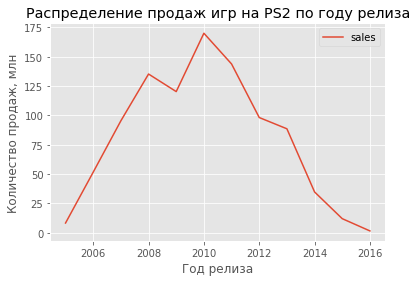

In [37]:
(
    intr_data
    .loc[intr_data['platform'] == 'X360',
         ['year_of_release', 'total_sales']]
    .groupby('year_of_release')
    .agg(sales=('total_sales', 'sum'))
    .reset_index()
    .plot(
        kind='line',
        x='year_of_release',
        y='sales',
        title='Распределение продаж игр на PS2 по году релиза',
        xlabel='Год релиза',
        ylabel='Количество продаж, млн'
    )
)

Пик продаж смещен c ~2005 на 2010, то есть эта платформа все-таки новее, и в будущем статистика по играм продажам может еще поменяться

Посмотрим как по датам исчезают и появляются игры на разных платформах

In [38]:
(
    data_year
    .pivot_table(
        index='platform',
        columns='year_of_release',
        values='name',
        aggfunc='count',
        fill_value=0
    )
    .sort_values(
        by=sorted(list(data_year['year_of_release'])),
        ascending=False
        )
    .style.background_gradient(cmap='inferno')
)

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2600,9,46,36,11,1,1,2,6,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
NES,0,0,0,6,13,11,19,10,11,5,8,7,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
PC,0,0,0,0,0,1,0,0,1,0,0,0,5,0,6,2,4,6,8,7,7,15,19,33,30,36,52,62,76,107,90,139,60,38,47,50,54
DS,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,118,201,376,492,403,323,153,23,8,0,0,0
GB,0,0,0,0,0,0,0,0,1,10,3,9,7,0,3,4,6,8,8,11,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
SNES,0,0,0,0,0,0,0,0,0,0,4,24,21,46,53,54,30,4,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GEN,0,0,0,0,0,0,0,0,0,0,1,1,6,7,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GG,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
NG,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


На отсортированных данных можно четко проследить, как со временем одни платформы исчезают, а новые появляются. Видно, что для игровых платформ (за исключением ПК) характерное время жизни составляет ~5-10 лет.

Для последующих исследований возьмем последние 4 года - так мы получим возможность делать прогнозы на 2017 по актуальным данным. Запишем эти данные в переменную `act_data`

In [39]:
act_data = data[data['year_of_release'] >= 2012]

### Анализ наиболее актуальных и прибыльных платформ

Посмотрим на платформы с наибольшими продажами

In [40]:
(
    act_data
    .groupby('platform')
    .agg(sales=('total_sales', 'sum'))
    .sort_values(by='sales', ascending=False)
    .reset_index()
    .head(10)
)

,platform,sales
0,PS4,314.14
1,PS3,288.78
2,X360,234.98
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.57
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


Для этих 10 самых продаваемых платформ построим еще раз сводную таблицу

In [41]:
top_platforms = (
    act_data
    .groupby('platform')
    .agg(sales=('total_sales', 'sum'))
    .sort_values(by='sales', ascending=False)
    .head(10)
    .index
    .to_list()
)

top_platforms

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS']

In [42]:
(
    act_data
    .query('platform in @top_platforms')
    .pivot_table(
        index='platform',
        columns='year_of_release',
        values='name',
        aggfunc='count',
        fill_value=0
    )
    .sort_values(
        by=sorted(list(act_data['year_of_release'])),
        ascending=False
        )
    .style.background_gradient(cmap='inferno')
)

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
PS3,147,126,108,73,38
X360,105,75,63,35,13
3DS,93,91,80,86,46
PC,60,38,47,50,54
PSV,53,63,100,110,85
WiiU,32,42,31,28,14
Wii,31,12,6,4,1
DS,23,8,0,0,0
XOne,0,19,61,80,87


По этой таблице видно, что PC находится на среднем уровне продаж, но эти значения стабильны. В то же время количество продаж PS3, 3DS, X360 начинает падать, на пике находятся платформы XOne и PS4 (причем PS4 обгоняет по продажам почти вдвое). Остальные платформы уже утратили актуальность. 

Можем построить распределения продаж по годам и платформам. Это может быть более наглядным

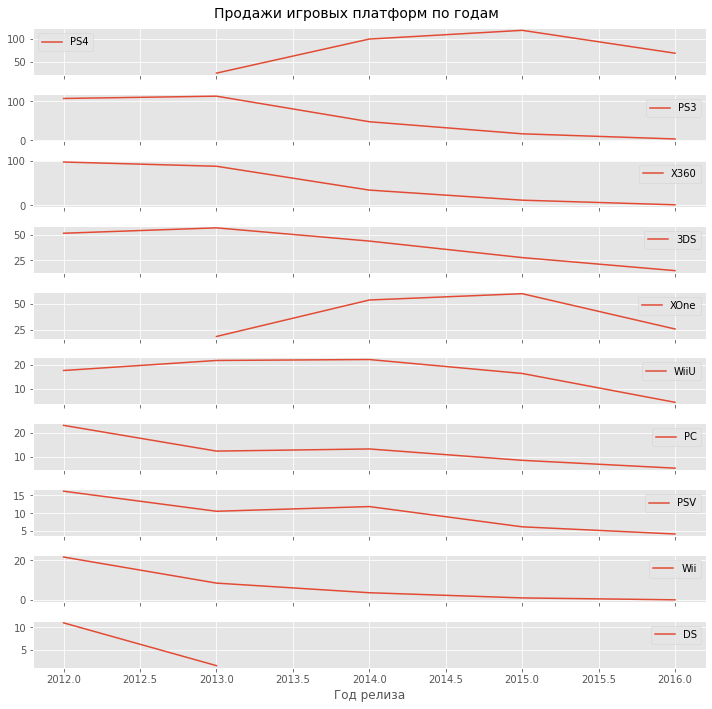

In [43]:
fig, axes = plt.subplots(len(top_platforms), 1, figsize=(10, 10), sharex=True)

for i, platform in enumerate(top_platforms):
    (
    act_data
    .loc[act_data['platform'] == platform,
         ['year_of_release', 'total_sales']]
    .groupby('year_of_release')
    .agg(sales=('total_sales', 'sum'))
    .reset_index()
    .plot(
        kind='line',
        x='year_of_release',
        y='sales',
        label=platform,
        xlabel='Год релиза',
        ax=axes[i]
        )
    )

fig.suptitle('Продажи игровых платформ по годам', fontsize=14)
# fig.supylabel('Количество продаж, млн')
plt.tight_layout()

Мы еще раз увидели, что пик продаж соответствует именно платформам PS4 и XOne - что мы и увидели по сводной таблицы выше

### Построение ящика с усами по продажам, анализ распределений

Оценим распределение продаж. Построим один график для всех продаж

In [44]:
act_data.total_sales.describe()

count    2883.000000
mean        0.501172
std         1.249594
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: total_sales, dtype: float64

Text(0.5, 1.0, 'Ящики с усами по продажам всех игр')

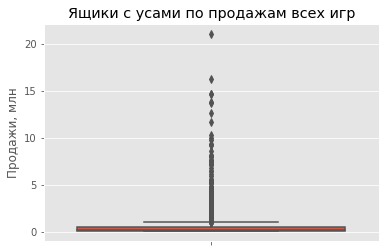

In [45]:
fig, ax = plt.subplots()

sns.boxplot(
    data=act_data,
    y='total_sales',
    ax=ax
)

ax.set_ylabel('Продажи, млн')
ax.set_title('Ящики с усами по продажам всех игр')

Видно, что квантили сильно смещены к 0, то есть вблизи 0 есть большое количество данных. При этом есть и выбросы - продажи доходят до 21.05 млн

Посмотрим сколько игр имеют меньше 1млн продаж, а сколько - больше. 

In [46]:
a = act_data[act_data['total_sales'] < 1].shape[0] 
print(f'Меньше 1млн продаж имеют {a} игр')

a = act_data[act_data['total_sales'] >= 1].shape[0]
print(f'Больше 1млн продаж имеют {a} игр')

a = act_data[act_data['total_sales'] > 1].shape[0] / act_data.shape[0]
print(f'Доля популярных игр: {a:.2%}')

Меньше 1млн продаж имеют 2547 игр
Больше 1млн продаж имеют 336 игр
Доля популярных игр: 11.65%


Посмотрим на распределение "популярных" и "непопулярных" игр

Text(0, 0.5, 'Число игр')

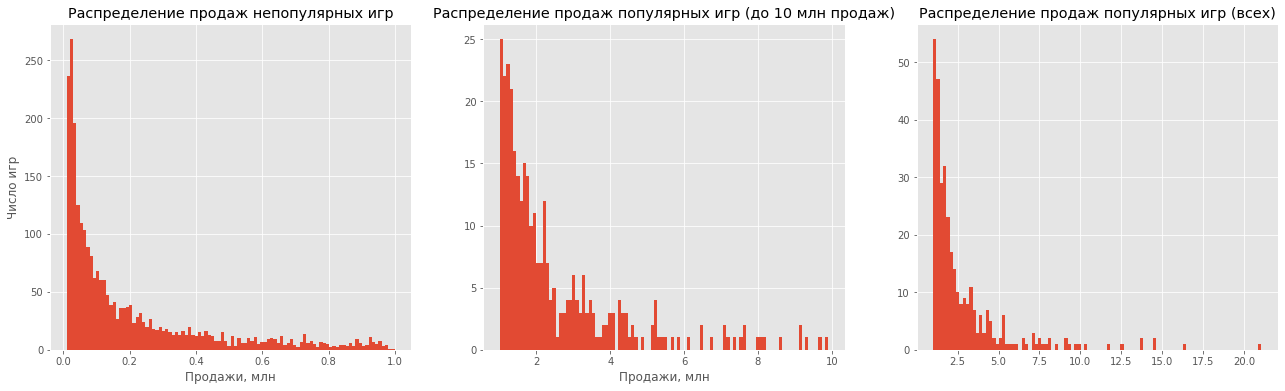

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

act_data[act_data['total_sales'] < 1].total_sales.hist(
    bins=100,
    ax=axes[0]
    )

act_data.loc[(act_data['total_sales'] > 1) & (data['total_sales'] < 10)].total_sales.hist(
    bins=100,
    ax=axes[1]
    )

act_data.loc[act_data['total_sales'] > 1].total_sales.hist(
    bins=100,
    ax=axes[2]
    )

axes[0].set_title('Распределение продаж непопулярных игр')
axes[1].set_title('Распределение продаж популярных игр (до 10 млн продаж)')
axes[2].set_title('Распределение продаж популярных игр (всех)')

axes[0].set_xlabel('Продажи, млн')
axes[1].set_xlabel('Продажи, млн')
axes[1].set_xlabel('Продажи, млн')

axes[0].set_ylabel('Число игр')

С увеличением числа продаж количество игр падает. Распределение похоже на Пуассоновское

Посмотрим как распределены суммарные продажи по платформам

count     11.000000
mean     131.352727
std      111.974570
min       11.190000
25%       42.275000
50%       82.190000
75%      214.795000
max      314.140000
Name: total_sales, dtype: float64

Text(0.5, 1.0, 'Ящики с усами по суммарным продажам по платформам')

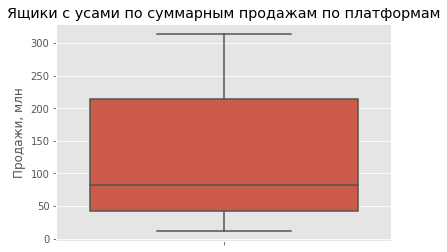

In [48]:
display(
    act_data
    .loc[:, ['platform', 'total_sales']]
    .groupby('platform')
    .total_sales
    .agg('sum')
    .describe()
)

sns.boxplot(
    data=(
        act_data
        .loc[:, ['platform', 'total_sales']]
        .groupby('platform')
        .total_sales
        .agg('sum')
        .reset_index()
    ),
    y='total_sales',
#     log_scale=False,
)

plt.ylabel('Продажи, млн')
plt.title('Ящики с усами по суммарным продажам по платформам')

Выбросов нет. Можно сказать, что нормальная платформа имеет  ~ 50 - 200 млн продаж. При этом медианное значение составляет 82 млн. 

Посмотрим на распределение продаж по отдельным платформам

Text(0.5, 1.0, 'Ящики с усами по продажам в полулогарифмическом масштабе')

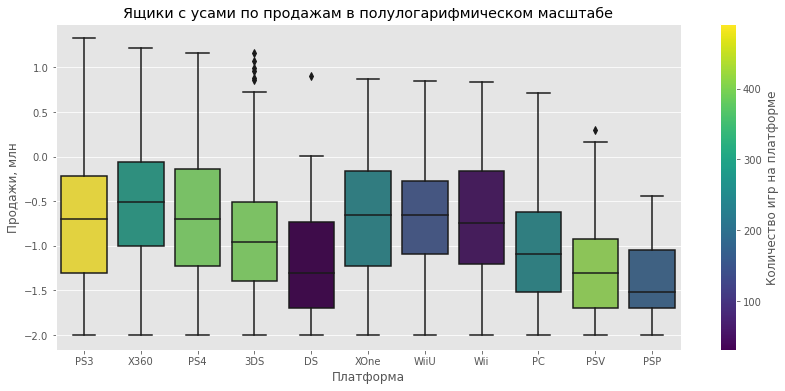

In [49]:
plt.figure(figsize=(14, 6))

platform_counts = act_data['platform'].value_counts().to_dict()

norm = plt.Normalize(min(platform_counts.values()), max(platform_counts.values()))
palette = plt.cm.viridis(norm([platform_counts[p] for p in act_data['platform'].unique()]))

sns.boxplot(
    data=act_data.assign(total_sales=np.log10(act_data['total_sales'])),
    x='platform',
    y='total_sales',
    palette=palette,
    
)

sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Количество игр на платформе')

plt.xlabel('Платформа')
plt.ylabel('Продажи, млн')
plt.title('Ящики с усами по продажам в полулогарифмическом масштабе')

По всем платформам вне зависимости от количества игр выбросов нет. Однако есть 3DS, DS, PSV где в среднем игры не самые популярные, но иногда появляются необычайно распространенные.

### Анализ влияния отзывов на продажи

Рассмотрим самую популярную из актуальных платформ - PS4. Выделим ее игры в отдельную таблицу. При чем выкинем все пропуски в столбцах с оценками (значения -1 в столбцах `user_score`, `critic_score`)

In [50]:
ps4_data = act_data.query(
    'platform == "PS4" '
    'and user_score != -1 '
    'and critic_score != -1'
    )

display(ps4_data.shape)
ps4_data

(249, 12)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16486,Super Dungeon Bros,PS4,2016,Action,0.01,0.00,0.00,0.00,42.0,2.3,E10+,0.01
16499,Sherlock Holmes: The Devil's Daughter,PS4,2016,Adventure,0.01,0.00,0.00,0.00,70.0,6.8,T,0.01
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,tbd,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01


Посмотрим на линейную корреляцию между оценками и числом продаж

In [51]:
(
    ps4_data
    .loc[:, ['total_sales', 'user_score', 'critic_score']]
    .corr()
    .style.background_gradient(cmap='inferno')
)

,total_sales,user_score,critic_score
total_sales,1.000000,-0.033625,0.405895
user_score,-0.033625,1.000000,0.557654
critic_score,0.405895,0.557654,1.000000


Есть слабые зависимости между оценками критиков и пользователей. И между оценкой критиков и количеством продаж

Отрисуем все диаграммы рассеяния

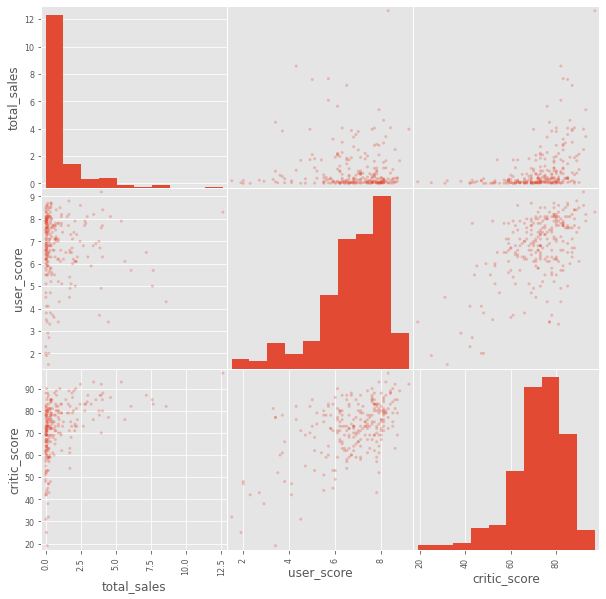

In [52]:
pd.plotting.scatter_matrix(
    ps4_data
    .loc[:, ['total_sales', 'user_score', 'critic_score']],
    alpha=0.3,
    figsize=(10, 10)
    );

Видим, что между оценками и продажами линейной зависимости нет, что согласуется с коэффициентами корреляции. При этом все-таки есть область оценок, когда число продаж не превосходит 1млн, причем для оценок критиков она выражена более явно.

Отрисуем такие же диаграммы рассеяния для других платформ

In [53]:
act_data['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

XOne


,total_sales,user_score,critic_score
total_sales,1.000000,-0.094003,0.410422
user_score,-0.094003,1.000000,0.472462
critic_score,0.410422,0.472462,1.000000


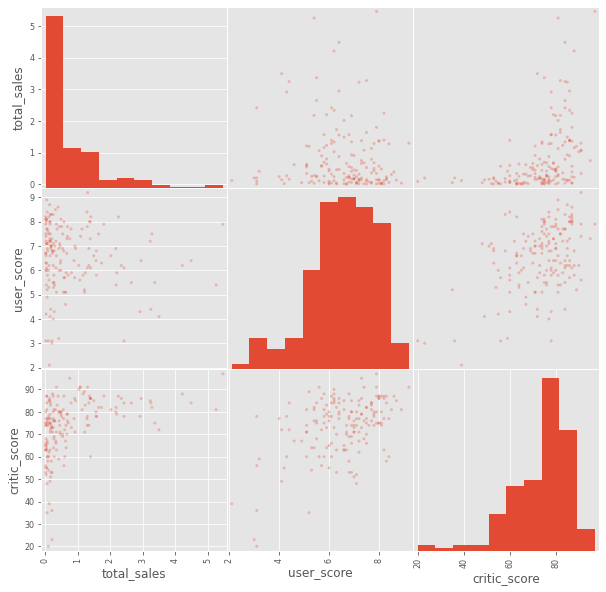

In [54]:
plat = 'XOne'

print(plat)

display(
    act_data.query(
    f'platform == "{plat}" '
    'and user_score != -1 '
    'and critic_score != -1'
    )
    .loc[:, ['total_sales', 'user_score', 'critic_score']]
    .corr()
    .style.background_gradient(cmap='inferno')
)

pd.plotting.scatter_matrix(
    act_data.query(
    f'platform == "{plat}" '
    'and user_score != -1 '
    'and critic_score != -1'
    )
    .loc[:, ['total_sales', 'user_score', 'critic_score']],
    alpha=0.3,
    figsize=(10, 10)
    );

3DS


,total_sales,user_score,critic_score
total_sales,1.000000,0.201813,0.310553
user_score,0.201813,1.000000,0.722762
critic_score,0.310553,0.722762,1.000000


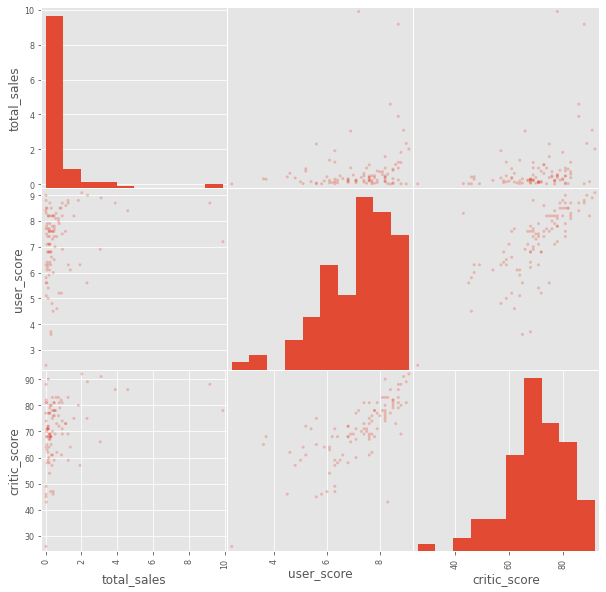

In [55]:
plat = '3DS'

print(plat)

display(
    act_data.query(
    f'platform == "{plat}" '
    'and user_score != -1 '
    'and critic_score != -1'
    )
    .loc[:, ['total_sales', 'user_score', 'critic_score']]
    .corr()
    .style.background_gradient(cmap='inferno')
)

pd.plotting.scatter_matrix(
    act_data.query(
    f'platform == "{plat}" '
    'and user_score != -1 '
    'and critic_score != -1'
    )
    .loc[:, ['total_sales', 'user_score', 'critic_score']],
    alpha=0.3,
    figsize=(10, 10)
    );

PC


,total_sales,user_score,critic_score
total_sales,1.000000,-0.135055,0.237475
user_score,-0.135055,1.000000,0.430926
critic_score,0.237475,0.430926,1.000000


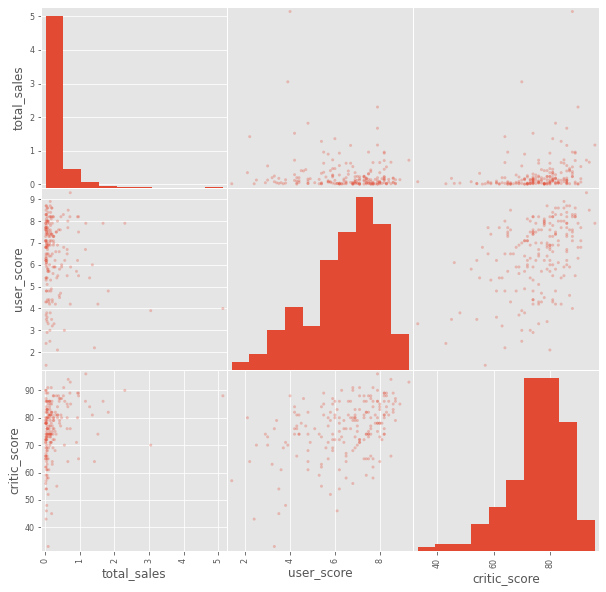

In [56]:
plat = 'PC'

print(plat)

display(
    act_data.query(
    f'platform == "{plat}" '
    'and user_score != -1 '
    'and critic_score != -1'
    )
    .loc[:, ['total_sales', 'user_score', 'critic_score']]
    .corr()
    .style.background_gradient(cmap='inferno')
)

pd.plotting.scatter_matrix(
    act_data.query(
    f'platform == "{plat}" '
    'and user_score != -1 '
    'and critic_score != -1'
    )
    .loc[:, ['total_sales', 'user_score', 'critic_score']],
    alpha=0.3,
    figsize=(10, 10)
    );

Посмотрим на те же данные, но для всех игр сразу

In [57]:
act_data_filtr = act_data.query(
    'user_score != -1 '
    'and critic_score != -1'
    )

display(act_data_filtr.shape)
act_data_filtr

(1294, 12)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16613,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16652,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,tbd,0.01


In [58]:
(
    act_data_filtr
    .loc[:, ['total_sales', 'user_score', 'critic_score']]
    .corr()
    .style.background_gradient(cmap='inferno')
)

,total_sales,user_score,critic_score
total_sales,1.000000,0.000213,0.307099
user_score,0.000213,1.000000,0.517926
critic_score,0.307099,0.517926,1.000000


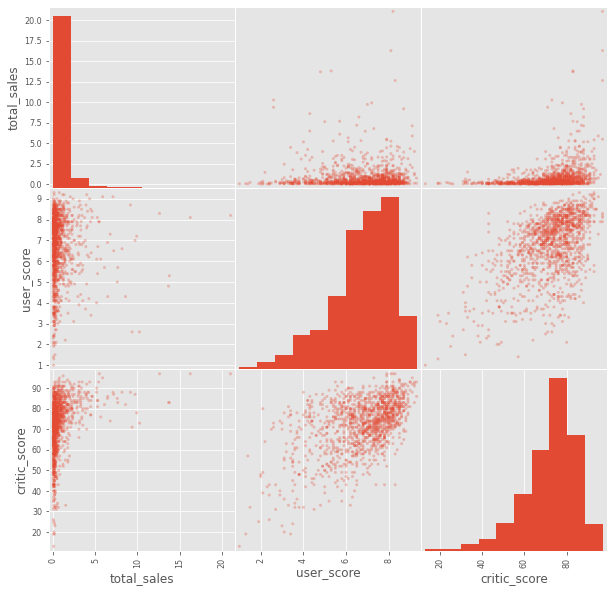

In [59]:
pd.plotting.scatter_matrix(
    act_data_filtr
    .loc[:, ['total_sales', 'user_score', 'critic_score']],
    alpha=0.3,
    figsize=(10, 10)
    );

Для некоторых платформ (например, XOne, PC) закономерности платформы PS4 сохраняются. При это есть, например, 3DS, где коэффициент корреляции между оценками критиков и пользователей в два раза больше (~0.7).

При рассмотрении всех данных, без разбиения на платформы, видно, что все эти закономерности тоже присутствуют, но менее выражены - это видно по величине коффициентов корреляции.

### Распределение игр по жанрам

Посмотрим на то, какие вообще жанры представлены в данных

Text(0, 0.5, '')

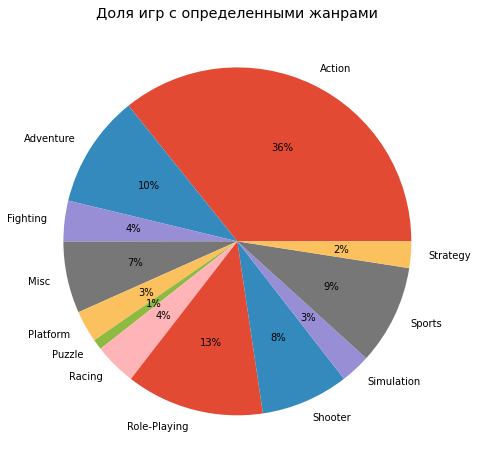

In [60]:
(
    act_data
    .groupby('genre')
    .name
    .count()
    .plot(
        kind='pie',
        autopct='%1.0f%%',
        title='Доля игр с определенными жанрами',
        figsize=(8, 8)
    )
)

plt.gca().set_ylabel('')

Видим, что с большим отрывом в топ выходит жанр Action. На более детальное распределение игр, с рассмотрением разных регионов, посмотрим далее

Посмотрим на то, какие продажи на каких данных

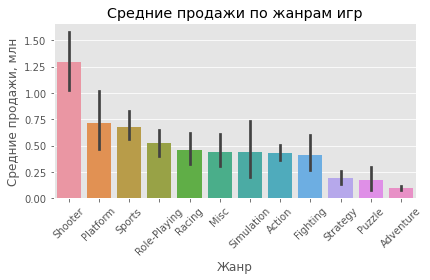

In [61]:
order = (
    act_data
    .groupby('genre')
    .total_sales
    .mean()
    .sort_values(ascending=False)
    .index
)

sns.barplot(
    data=act_data,
    x='genre',
    y='total_sales',
    estimator=np.mean,
#     errorbar=None,
    order=order
)

plt.title('Средние продажи по жанрам игр')
plt.xlabel('Жанр')
plt.ylabel('Средние продажи, млн')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

Посмотрим на глобальные продажи

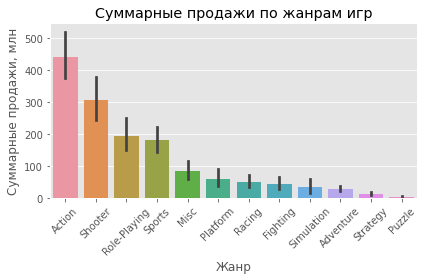

In [62]:
order = (
    act_data
    .groupby('genre')
    .total_sales
    .sum()
    .sort_values(ascending=False)
    .index
)

sns.barplot(
    data=act_data,
    x='genre',
    y='total_sales',
    estimator=np.sum,
#     errorbar=None,
    order=order
)

plt.title('Суммарные продажи по жанрам игр')
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи, млн')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

### Вывод

Во время проведения исследовательского анализа данных были получены следующие результаты:

* Основная масса игр была выпущена после 2000 (около 86%). Основной пик выпуска пришелся на 2008-2009гг.
* Характерное время жизни платформ на рынке игр 5-10 лет. В 2017 ожидаются хорошие продажи только двух платформ - PS4 и XOne. При этом продажи PS4 вдвое выше.
* Продажи игр имеют схожее на пуассоновское распределение - большая часть игр (88%) имеет меньше 1млн продаж, при этом есть выбросы - игры имеющие до 22 млн продаж.
* Медианная продажа по платформам составила 82 млн копий. Для отдельных платформ продаже варьируются.
* На примере наиболее продаваемой из успешных на 2017 год платформ - PS4, показали связь оценок игр и их продажами: отзывы критиков в большей степени связаны с продажами - до определеноой оценки 50 нет ни одной игры с продажами выше 1млн. Такая же закономерность наблюдается и для всех игр, но зависимость менее выражена - зато оценка пользователей влияет сильнее.
* Самым популярным жанром является Action (36% игр), на вотором и третьем местах - Role-Playing (13%) и Adventure (10%). Наибольшие средние продажи у жанров Shooter, platforms и sports. Самые низкие сборы - у игр жанров puzzle, strategy, adventure.

## Составление портретов жителей разных регионов

### Популярные платформы

Для трех основных регионов (NA, EU, JP) рассмотрим топ популярных платформ

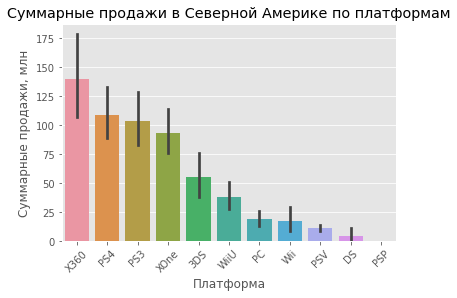

In [63]:
na_top_platform = (
    act_data
    .groupby('platform')
    .na_sales
    .sum()
    .sort_values(ascending=False)
)

na_ax = sns.barplot(
    data=act_data,
    x='platform',
    y='na_sales',
    estimator=np.sum,
#     errorbar=None,
    order=na_top_platform.index
)

na_ax.set_title('Суммарные продажи в Северной Америке по платформам')
na_ax.set_xlabel('Платформа')
na_ax.set_ylabel('Суммарные продажи, млн')
na_ax.set_xticklabels(na_top_platform.index, rotation=45);

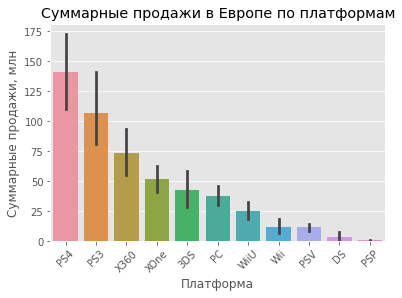

In [64]:
eu_top_platform = (
    act_data
    .groupby('platform')
    .eu_sales
    .sum()
    .sort_values(ascending=False)
)

eu_ax = sns.barplot(
    data=act_data,
    x='platform',
    y='eu_sales',
    estimator=np.sum,
#     errorbar=None,
    order=eu_top_platform.index
)

eu_ax.set_title('Суммарные продажи в Европе по платформам')
eu_ax.set_xlabel('Платформа')
eu_ax.set_ylabel('Суммарные продажи, млн')
eu_ax.set_xticklabels(eu_top_platform.index, rotation=45);

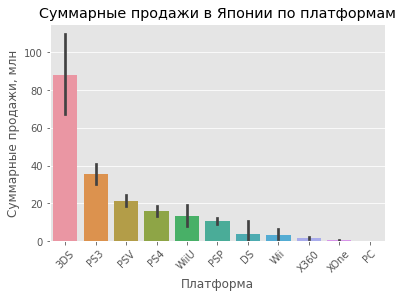

In [65]:
jp_top_platform = (
    act_data
    .groupby('platform')
    .jp_sales
    .sum()
    .sort_values(ascending=False)
)

jp_ax = sns.barplot(
    data=act_data,
    x='platform',
    y='jp_sales',
    estimator=np.sum,
#     errorbar=None,
    order=jp_top_platform.index
)

jp_ax.set_title('Суммарные продажи в Японии по платформам')
jp_ax.set_xlabel('Платформа')
jp_ax.set_ylabel('Суммарные продажи, млн')
jp_ax.set_xticklabels(jp_top_platform.index, rotation=45);

Выведем таблицы с топовыми платформами

In [66]:
print('Продажи в Северной Америке')
display(na_top_platform.reset_index()[:5])
print('Продажи в Европе')
display(eu_top_platform.reset_index()[:5])
print('Продажи в Японии')
display(jp_top_platform.reset_index()[:5])

Продажи в Северной Америке


,platform,na_sales
0,X360,139.43
1,PS4,108.74
2,PS3,103.38
3,XOne,93.12
4,3DS,55.31


Продажи в Европе


,platform,eu_sales
0,PS4,141.09
1,PS3,106.85
2,X360,73.74
3,XOne,51.59
4,3DS,42.64


Продажи в Японии


,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01


Видно, что в Америке и Европе в топе находятся одни и те же консоли - Xbox и PlayStation. Отличается только отношение продаж - в Европе лидирует с отрывом PS4, а в Америке - X360 (американской компании). В Японии в топе только японские платформы PlayStation и Nintendo, причем последняя лидирует с огромным отрывом

### Популярные жанры

Таким же образом рассмотрим популярные в разных регионах (NA, EU, JP) топ популярных жанров

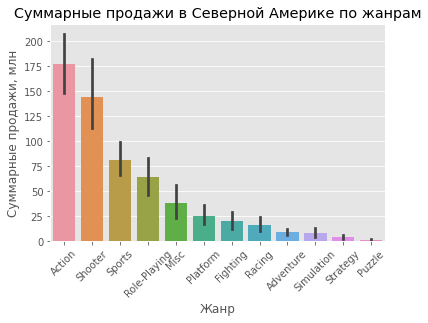

In [67]:
na_top_genre = (
    act_data
    .groupby('genre')
    .na_sales
    .sum()
    .sort_values(ascending=False)
)

na_ax = sns.barplot(
    data=act_data,
    x='genre',
    y='na_sales',
    estimator=np.sum,
#     errorbar=None,
    order=na_top_genre.index
)

na_ax.set_title('Суммарные продажи в Северной Америке по жанрам')
na_ax.set_xlabel('Жанр')
na_ax.set_ylabel('Суммарные продажи, млн')
na_ax.set_xticklabels(na_top_genre.index, rotation=45);

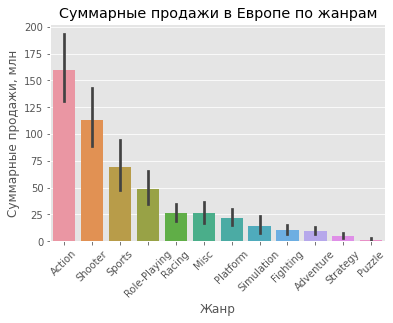

In [68]:
eu_top_genre = (
    act_data
    .groupby('genre')
    .eu_sales
    .sum()
    .sort_values(ascending=False)
)

eu_ax = sns.barplot(
    data=act_data,
    x='genre',
    y='eu_sales',
    estimator=np.sum,
#     errorbar=None,
    order=eu_top_genre.index
)

eu_ax.set_title('Суммарные продажи в Европе по жанрам')
eu_ax.set_xlabel('Жанр')
eu_ax.set_ylabel('Суммарные продажи, млн')
eu_ax.set_xticklabels(eu_top_genre.index, rotation=45);

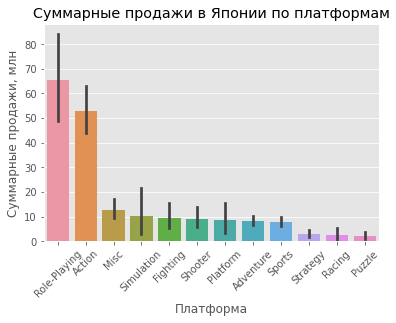

In [69]:
jp_top_genre = (
    act_data
    .groupby('genre')
    .jp_sales
    .sum()
    .sort_values(ascending=False)
)

jp_ax = sns.barplot(
    data=act_data,
    x='genre',
    y='jp_sales',
    estimator=np.sum,
#     errorbar=None,
    order=jp_top_genre.index
)

jp_ax.set_title('Суммарные продажи в Японии по платформам')
jp_ax.set_xlabel('Платформа')
jp_ax.set_ylabel('Суммарные продажи, млн')
jp_ax.set_xticklabels(jp_top_genre.index, rotation=45);

In [70]:
print('Продажи в Северной Америке')
display(na_top_genre.reset_index()[:5])
print('Продажи в Европе')
display(eu_top_genre.reset_index()[:5])
print('Продажи в Японии')
display(jp_top_genre.reset_index()[:5])

Продажи в Северной Америке


,genre,na_sales
0,Action,177.84
1,Shooter,144.77
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19


Продажи в Европе


,genre,eu_sales
0,Action,159.34
1,Shooter,113.47
2,Sports,69.08
3,Role-Playing,48.53
4,Racing,26.45


Продажи в Японии


,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44


Самые попялрные жанры в Америке и Европы почти целиком совпадают - Action, Sports, Shooter, Role-Playing находятся в топе. Японские популярные жанры отличаются - жанр Role-Playing лидирует с большим отрывом. Жанры Puzzle и Strategy везде имеют низкие продажи, но в Японии они ещё менее популярны.

In [71]:
act_data[act_data['genre'] == 'Role-Playing'].name.head(20)

33                           Pokemon X/Pokemon Y
47     Pokemon Omega Ruby/Pokemon Alpha Sapphire
83               Pokemon Black 2/Pokemon White 2
105                                    Fallout 4
108                             Pokemon Sun/Moon
192                                   Diablo III
270                                    Fallout 4
303                     The Witcher 3: Wild Hunt
312                    Monster Hunter 4 Ultimate
385                             Monster Hunter 4
412                    Yokai Watch 2 Ganso/Honke
462                                Mass Effect 3
563                       Yokai Watch 2 Shinuchi
690                    Paper Mario: Sticker Star
798                                  Yokai Watch
807                    Mario & Luigi: Dream Team
848                       Fire Emblem: Awakening
851                      Dragon Age: Inquisition
907                                   Diablo III
957                                   Diablo III
Name: name, dtype: o

### Связь рейтинга на продажи в разных регионах

Посмотрим какие продажи у каких рейтингов есть

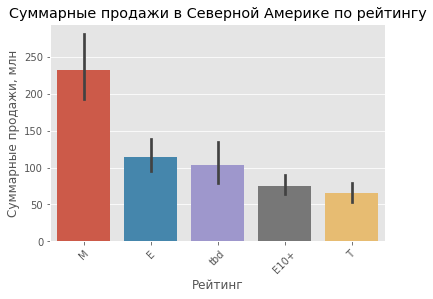

In [72]:
na_top_rating = (
    act_data
    .groupby('rating')
    .na_sales
    .sum()
    .sort_values(ascending=False)
)

na_ax = sns.barplot(
    data=act_data,
    x='rating',
    y='na_sales',
    estimator=np.sum,
#     errorbar=None,
    order=na_top_rating.index
)

na_ax.set_title('Суммарные продажи в Северной Америке по рейтингу')
na_ax.set_xlabel('Рейтинг')
na_ax.set_ylabel('Суммарные продажи, млн')
na_ax.set_xticklabels(na_top_rating.index, rotation=45);

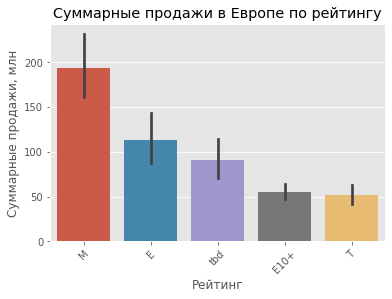

In [73]:
eu_top_rating = (
    act_data
    .groupby('rating')
    .eu_sales
    .sum()
    .sort_values(ascending=False)
)

eu_ax = sns.barplot(
    data=act_data,
    x='rating',
    y='eu_sales',
    estimator=np.sum,
#     errorbar=None,
    order=eu_top_rating.index
)

eu_ax.set_title('Суммарные продажи в Европе по рейтингу')
eu_ax.set_xlabel('Рейтинг')
eu_ax.set_ylabel('Суммарные продажи, млн')
eu_ax.set_xticklabels(eu_top_rating.index, rotation=45);

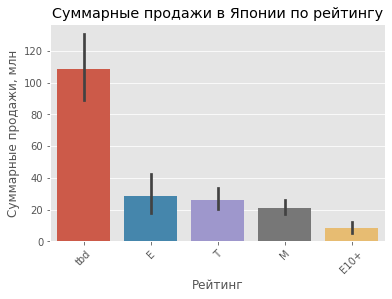

In [74]:
jp_top_rating = (
    act_data
    .groupby('rating')
    .jp_sales
    .sum()
    .sort_values(ascending=False)
)

eu_ax = sns.barplot(
    data=act_data,
    x='rating',
    y='jp_sales',
    estimator=np.sum,
#     errorbar=None,
    order=jp_top_rating.index
)

eu_ax.set_title('Суммарные продажи в Японии по рейтингу')
eu_ax.set_xlabel('Рейтинг')
eu_ax.set_ylabel('Суммарные продажи, млн')
eu_ax.set_xticklabels(jp_top_rating.index, rotation=45);

In [75]:
print('Продажи в Северной Америке')
display(na_top_rating.reset_index()[:5])
print('Продажи в Европе')
display(eu_top_rating.reset_index()[:5])
print('Продажи в Японии')
display(jp_top_rating.reset_index()[:5])

Продажи в Северной Америке


,rating,na_sales
0,M,231.57
1,E,114.37
2,tbd,103.31
3,E10+,75.70
4,T,65.40


Продажи в Европе


,rating,eu_sales
0,M,193.96
1,E,113.02
2,tbd,91.50
3,E10+,55.37
4,T,52.12


Продажи в Японии


,rating,jp_sales
0,tbd,108.84
1,E,28.33
2,T,26.01
3,M,21.20
4,E10+,8.19


В Европе и Америке на первом месте стоит рейтинг M (17+) - что коррелирует с тем, что там самыми популярными жанрами являются Action и Shooter. На втором месте стоит рейтинг Е (6+) - детские игры подходят как для детей, так и для всех семьи. Причем эти игры проще выпускать, так что их может быть просто больше.

В Японии с большим отрывом лидирует платформа Nintendo, самый популярный жанр - Role-Playing, это все связано с тем, что самым популярным рейтингом игр является Е (6+) - как раз те игры, что в по большей части выпускает Nintendo для своих консолей. 

### Вывод

Рассмотрение закономерностей продажи игр в трех основных регионах - Северной Америке, Европе и Японии, выявило следующие замечания:

**Северная Америка**

* В NA доминируют консоли Xbox и PlayStation (X360, PS4, PS3, XOne).
* Самые популярные жанры - Action, Sports, Shooter, Role-Playing
* С большим отрывом по продажам лидирует рейтинг M (17+), затем - Е (6+)

**Европа**

* В EU лидируют ие же популярные консоли, как и в Америке, отличается только отношение: (PS4, PS3, X360, XOne)
* Рейтинг жанров совпадает с американским
* Наиболее популярные возрастные рейтинги также совпадают с американскими

**Япония**

* В JP весь топ занят японскими платформами - Nintendo (DS3, WiiU) и Sony Playstation (PS3, PSV, PS4): 3DS, PS3, PSV, PS4, WiiU
* Самые популярные жанры - Role-Playing, Action, Misc, Simulation, Fighting. Топ отличается от других регионов - вероятно, есть связь с распространением платформ
* В отличие от остальных регионов, на первом месте стоят E (6+) и T (13+) - что коррелирует с популярными жанрами

Таким образом Основные особенности Европы и Северной Америки по играм очень сильно похожи, но в Европе выбор самих платформ более разнообразен. В свою очередь, Японский район во всех моментах сильно отличается от остального мира, это отличие ментальности нужно учитывать.

## Проверка гипотез

Установим $alpha = 0.05$

In [76]:
alpha = 0.05

### Равенство средних пользовательских рейтингов платформ PC, XOne

Сформулируем гипотезы:

* $H_0$: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

* $H_1$: Средние пользовательские рейтинги платформ Xbox One и PC отличаются

Сначала составим две числовые выборки

In [77]:
xone_scores = (
    act_data
    .query('user_score != -1 and platform == "XOne"')
    .loc[:, 'user_score']
    )

xone_scores.shape

(182,)

In [78]:
pc_scores = (
    act_data
    .query('user_score != -1 and platform == "PC"')
    .loc[:, 'user_score']
    )

pc_scores.shape

(205,)

Проверим имеют ли данные нормальное распределение

In [79]:
shapiro_pc = st.shapiro(xone_scores)
shapiro_xone = st.shapiro(pc_scores)

print(f'''Тест Шапиро-Уилка для PC:\
 p-value = {shapiro_pc.pvalue}''')
print(f'Тест Шапиро-Уилка для XOne:\
 p-value = {shapiro_xone.pvalue}');

Тест Шапиро-Уилка для PC: p-value = 1.5249203897838015e-05
Тест Шапиро-Уилка для XOne: p-value = 1.3002413368212729e-07


Проверим насколько данные симметричны

In [80]:
print(f'Показатель перекоса для PC: {pc_scores.skew()}')
print(f'Показатель перекоса для XOne: {xone_scores.skew()}')

Показатель перекоса для PC: -0.816003947796758
Показатель перекоса для XOne: -0.8581587166672457


Таким образом, данные имеют отличное от нормального распределение. Будем использовать непараметрический тест Манна-Уитни (для умеренно асимметричных независимых выборок с распределениями, отличными от нормальных он подойдет лучше всего)

In [81]:
u_test = st.mannwhitneyu(
    pc_scores,
    xone_scores
)

print(f'U-test: p-value = {u_test.pvalue}')

if u_test.pvalue < alpha:
    print('Нулевая гипотеза отвергается')
else:
    print('Нулевая гипотеза не отвергается')

U-test: p-value = 0.9256236592481658
Нулевая гипотеза не отвергается


In [82]:
print(f'Средняя пользовательская оценка PC: {pc_scores.mean():.2f}')
print(f'Средняя пользовательская оценка XOne: {xone_scores.mean():.2f}')

Средняя пользовательская оценка PC: 6.42
Средняя пользовательская оценка XOne: 6.52


### Равенство средних пользовательских рейтингов жанров Action и Sports

Сформулируем гипотезы:

* $H_0$: Средние пользовательские рейтинги жанров Action и Sports одинаковые

* $H_1$: Средние пользовательские рейтинги жанров Action и Sports отличаются

Составим две числовые выборки

In [83]:
action_scores = (
    act_data
    .query('user_score != -1 and genre == "Action"')
    .loc[:, 'user_score']
    )

action_scores.shape

(523,)

In [84]:
sports_scores = (
    act_data
    .query('user_score != -1 and genre == "Sports"')
    .loc[:, 'user_score']
    )

sports_scores.shape

(194,)

Проверим как распределены данные

In [85]:
shapiro_action = st.shapiro(action_scores)
shapiro_sports = st.shapiro(sports_scores)

print(f'''Тест Шапиро-Уилка для Action:\
 p-value = {shapiro_action.pvalue}''')
print(f'Тест Шапиро-Уилка для Sports:\
 p-value = {shapiro_sports.pvalue}');

Тест Шапиро-Уилка для Action: p-value = 8.149073036706599e-17
Тест Шапиро-Уилка для Sports: p-value = 0.0002536389511078596


Проверим симметричность данных

In [86]:
print(f'Показатель перекоса для Action: {action_scores.skew()}')
print(f'Показатель перекоса для Sports: {sports_scores.skew()}')

Показатель перекоса для Action: -1.1391646677923475
Показатель перекоса для Sports: -0.5598524761815917


Таким образом, данные имеют отличное от нормального распределение. Будем использовать непараметрический тест Манна-Уитни (для умеренно асимметричных независимых выборок с распределениями, отличными от нормальных он подойдет лучше всего)

In [87]:
u_test = st.mannwhitneyu(
    action_scores,
    sports_scores
)

print(f'U-test: p-value = {u_test.pvalue}')

if u_test.pvalue < alpha:
    print('Нулевая гипотеза отвергается')
else:
    print('Нулевая гипотеза не отвергается')

U-test: p-value = 1.675070648217116e-23
Нулевая гипотеза отвергается


In [88]:
print(f'Средняя пользовательская оценка Action: {action_scores.mean():.2f}')
print(f'Средняя пользовательская оценка Sports: {sports_scores.mean():.2f}')

Средняя пользовательская оценка Action: 6.83
Средняя пользовательская оценка Sports: 5.46


### Вывод

Проверили две гипотезы:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Средние пользовательские рейтинги жанров Action и Sports одинаковые

Данные имели распределение, отличное от нормального. При этом был умеренный (почти сильный) перекос. Был выбран непараметрический тест Манна-Уитни. По его результатам обе гипотезы были отвергнуты. Действительно, средние были отличными

## Вывод

**Были выявлены особенности данных:**
* наличие большого числа пропусков в оценках игр, а также их возрастных рейтингах. Меньше пропусков есть в названиях и годе релиза 
* тип данных в столбце User_Score указан object, вместо float, а в year_of_release float вместо int 
* в данных есть повторы, так как есть устаревший рейтинг "K-A"
* в названиях столбцов присутствуют заглавные буквы

**Во время предобработки данных было сделано следующее:**
* привод названий столбцов к нижнему регистру
* преобразования формата данных столбца `year_or_release` к `int`, а `user_score` - к `float`
* удаление 4 дубликатов по столбцам `name` и `platform`
* удаление двух объектов с пропусками в столбцах `name` и `genre`
* в столбцах `user_score`, `critic_score` пропуски были заменены на нереальное значение -1, чтобы не терять полезных данных. В столбце `rating` пропуски заменили на оригинальное `tbd` - значение неопределенности
* просуммировали все значения продаж во всех регионах, сохранили в новом столбце `total_sales`

Пропуски в оценках, рейтингах преимущественно принадлежат старым играм. Возможно в то время такие данные не собирали. По поводу совеременных игр - это может быть ошибка загрузки данных. Ошибки в более значимых характеристик - `name`, `year_of_release` более вероятно принадлежат ошибкам сбора или обработки данных. 

**Во время проведения исследовательского анализа данных были получены следующие результаты:**
* Основная масса игр была выпущена после 2000 (около 86%). Основной пик выпуска пришелся на 2008-2009гг.
* Характерное время жизни платформ на рынке игр 5-10 лет. В 2017 ожидаются хорошие продажи только двух платформ - PS4 и XOne. При этом продажи PS4 вдвое выше.
* Продажи игр имеют схожее на пуассоновское распределение - большая часть игр (88%) имеет меньше 1млн продаж, при этом есть выбросы - игры имеющие до 22 млн продаж.
* Медианная продажа по платформам составила 82 млн копий. Для отдельных платформ продаже варьируются.
* На примере наиболее продаваемой из успешных на 2017 год платформ - PS4, показали связь оценок игр и их продажами: отзывы критиков в большей степени связаны с продажами - до определеноой оценки 50 нет ни одной игры с продажами выше 1млн. Такая же закономерность наблюдается и для всех игр, но зависимость менее выражена - зато оценка пользователей влияет сильнее.
* Самым популярным жанром является Action (36% игр), на вотором и третьем местах - Role-Playing (13%) и Adventure (10%). Наибольшие средние продажи у жанров Shooter, platforms и sports. Самые низкие сборы - у игр жанров puzzle, strategy, adventure.

Рассмотрение закономерностей продажи игр в трех основных регионах - Северной Америке, Европе и Японии, выявило следующие замечания:

**Северная Америка**

* В NA доминируют консоли Xbox и PlayStation (X360, PS4, PS3, XOne).
* Самые популярные жанры - Action, Sports, Shooter, Role-Playing
* С большим отрывом по продажам лидирует рейтинг M (17+), затем - Е (6+)

**Европа**

* В EU лидируют ие же популярные консоли, как и в Америке, отличается только отношение: (PS4, PS3, X360, XOne)
* Рейтинг жанров совпадает с американским
* Наиболее популярные возрастные рейтинги также совпадают с американскими

**Япония**

* В JP весь топ занят японскими платформами - Nintendo (DS3, WiiU) и Sony Playstation (PS3, PSV, PS4): 3DS, PS3, PSV, PS4, WiiU
* Самые популярные жанры - Role-Playing, Action, Misc, Simulation, Fighting. Топ отличается от других регионов - вероятно, есть связь с распространением платформ
* В отличие от остальных регионов, на первом месте стоят E (6+) и T (13+) - что коррелирует с популярными жанрами

Таким образом Основные особенности Европы и Северной Америки по играм очень сильно похожи, но в Европе выбор самих платформ более разнообразен. В свою очередь, Японский район во всех моментах сильно отличается от остального мира, это отличие ментальности нужно учитывать.

**Проверка двух гипотез:**

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
* Средние пользовательские рейтинги жанров Action и Sports одинаковые

Данные имели распределение, отличное от нормального. При этом был умеренный (почти сильный) перекос ($\approx -1$). Был выбран непараметрический тест Манна-Уитни. 

Результаты:
* Для гипотезы о платформах: $p-value = 4.72 \cdot 10^{-5}$
* Для гипотезы о платформах: $p-value = 4.44 \cdot 10^{-9}$

По его результатам обе гипотезы были отвергнуты.